## Requirements
#### In order to perform an analysis through this file, all result tables (NumGene=100, 300, 500, 700, 900) must already be included in the EvalResults folder.
#### Results tables that already exist in the folder were generated through the work of the authors.
#### Originally, those tables can be generated by running 2.x.Select_Name.py (ex, 2.3.Select_BestRCFR.py or 2.6.Select_BestRCFR_AC_W1.py).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean as npMean
import re

# Performance difference by clustering size 

In [2]:
def PerformancebyNumGene_CL (TestColName, TestLabelName, MetricTotal, SignList, AxisList, TitleList):
    plt.figure(figsize=(20,11))

    IMNum = 0
    for numj, j in enumerate(TestColName):
        for numi, i in enumerate(SignList):
            plt.subplot(len(SignList),len(TestColName),IMNum+1)

            if IMNum != 3:
                ax = sns.swarmplot(x='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], palette=['green','orange'], order=AxisList, size=8, alpha=0.8, linewidth=1.5, edgecolor='gray', zorder=1, hue='GroupM')
                sns.pointplot(x ='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], estimator=npMean, order=AxisList, palette=['green','orange'],
                              capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='GroupM', linestyles=["-", "-"], scale=0.8)
                handles, labels = ax.get_legend_handles_labels()
                ax.legend_.remove()
            else:
                ax = sns.swarmplot(x='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], palette=['green','orange'], order=AxisList, size=8, alpha=0.8, linewidth=1.5, edgecolor='gray', zorder=1, hue='GroupM')
                sns.pointplot(x ='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], estimator=npMean, order=AxisList, palette=['green','orange'],
                              capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='GroupM', linestyles=["-", "-"], scale=0.8)
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(handles[:2], labels[:2],bbox_to_anchor=(1., 0.4), loc=0, ncol=1,  prop={'size': 16})

            if IMNum >= 2:
                ax.set_xlabel('The max number of genes in a cluster (Kn)', size=20, labelpad=5)
            else:
                ax.set_xlabel('', size=1, labelpad=5)

            plt.xticks(fontsize=20, rotation=15)
            plt.yticks(np.arange(0, 0.8, step=0.1), fontsize=20, rotation=15)
            ax.set_ylabel(TitleList[numj], size=20 )
            
            plt.subplots_adjust(hspace=0.45,wspace=0.14)
            plt.title(SignList[numi],fontsize=20, pad=10)
            IMNum += 1

In [3]:
DIR = './EvalResults/'
MetricTableList = os.listdir(DIR)
MetricTableList1 = [i for i in MetricTableList if 'AggMetricRank' in i and 'RCFR_AC' in i and 'W3' in i and 'No' not in i ]
MetricTableList2 = [i for i in MetricTableList if 'AggMetricRank' in i and 'RCFR_AC_NoCL' in i ] 
MetricTableList= MetricTableList1 + MetricTableList2

PosMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+re.findall('.\d+', i)[1][1:]+'.csv', '_'+re.findall('.\d+', i)[1][1:]) : pd.read_csv(DIR+i) for Num, i in enumerate(MetricTableList)  if 'Pos' in i} 
NegMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+re.findall('.\d+', i)[1][1:]+'.csv', '_'+re.findall('.\d+', i)[1][1:]) : pd.read_csv(DIR+i) for Num, i in enumerate(MetricTableList)  if 'Neg' in i} 

for Tab in PosMetTabDic:
    PosMetTabDic[Tab]['NumGene_CL'] = re.findall('.\d+', Tab)[1][1:]
for Tab in NegMetTabDic:
    NegMetTabDic[Tab]['NumGene_CL'] = re.findall('.\d+', Tab)[1][1:]
    
PosMetricTotal = pd.concat(PosMetTabDic).reset_index(drop=True)
NegMetricTotal = pd.concat(NegMetTabDic).reset_index(drop=True)
NegMetricTotal['Sign'] = 'Negative'
PosMetricTotal['Sign'] = 'Positive'

NegMetricTotal.columns = [i.replace('Neg','') for i in NegMetricTotal.columns.tolist()]
PosMetricTotal.columns = [i.replace('Pos','') for i in PosMetricTotal.columns.tolist()]

Agg_MetricTotal = pd.concat([PosMetricTotal, NegMetricTotal], axis=0).copy()
Agg_MetricTotal['GroupM'] = 'RCFR_AC'+'$^{†3}$'
Agg_MetricTotal.loc[Agg_MetricTotal['Model'].str.contains('NoCL'), 'GroupM'] = 'RCFR_AC'+'$_{NoCL}$'
SignList = np.unique(Agg_MetricTotal['Sign'])
AxisList = np.unique(Agg_MetricTotal['NumGene_CL']).tolist()
TestColName = ['MinSigRate', 'AvgSigRate']
TestLabelName = ["Significance rate","Significance rate"]
TitleList = ['Min sig. rate', 'Mean sig. rate' ]
Agg_MetricTotal['SigHue'] = Agg_MetricTotal['MaxSurvpVal'] < 0.05

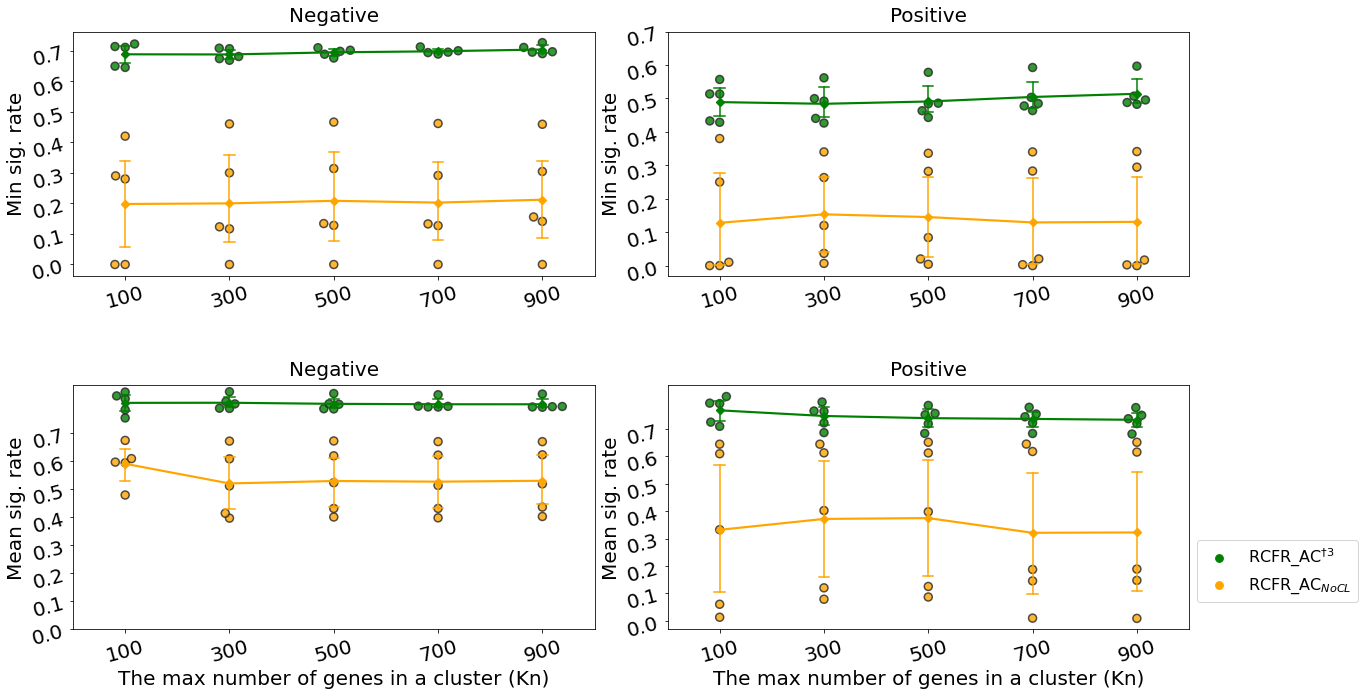

In [4]:
PerformancebyNumGene_CL(TestColName, TestLabelName, Agg_MetricTotal, SignList, np.unique(Agg_MetricTotal['NumGene_CL']).tolist(), TitleList)
plt.savefig('./Figures/PerformanceCompbyNumGene_CL.png')